# What is good food?

## 📖 Background
You and your friend have gotten into a debate about nutrition. Your friend follows a high-protein diet and does not eat any carbohydrates (no grains, no fruits). You claim that a balanced diet should contain all nutrients but should be low in calories. Both of you quickly realize that most of what you know about nutrition comes from mainstream and social media.

Being the data scientist that you are, you offer to look at the data yourself to answer a few key questions.

## 💾 The data

You source nutrition data from USDA's FoodData Central [website](https://fdc.nal.usda.gov/download-datasets.html). This data contains the calorie content of 7,793 common foods, as well as their nutritional composition. Each row represents one food item, and nutritional values are based on a 100g serving. Here is a description of the columns:

- **FDC_ID**: A unique identifier for each food item in the database.
- **Item**: The name or description of the food product.
- **Category**: The category or classification of the food item, such as "Baked Products" or "Vegetables and Vegetable Products".
- **Calories**: The energy content of the food, presented in kilocalories (kcal).
- **Protein**: The protein content of the food, measured in grams.
- **Carbohydrate**: The carbohydrate content of the food, measured in grams.
- **Total fat**: The total fat content of the food, measured in grams.
- **Cholesterol**: The cholesterol content of the food, measured in milligrams.
- **Fiber**: The dietary fiber content of the food, measured in grams.
- **Water**: The water content of the food, measured in grams.
- **Alcohol**: The alcohol content of the food (if any), measured in grams.
- **Vitamin C**: The Vitamin C content of the food, measured in milligrams.

In [1]:
import pandas as pd
df_food = pd.read_csv('nutrition.csv')
df_food

FDC_ID  ... Vitamin C
0     167512  ...       NaN
1     167513  ...    0.1 mg
2     167514  ...       NaN
3     167515  ...       NaN
4     167516  ...    0.0 mg
...      ...  ...       ...
7788  175300  ...    0.0 mg
7789  175301  ...    0.0 mg
7790  175302  ...    0.0 mg
7791  175303  ...    0.0 mg
7792  175304  ...    0.0 mg

[7793 rows x 12 columns]

## 💪 Competition challenge

Create a report that covers the following:

1. Which fruit has the highest vitamin C content? What are some other sources of vitamin C?
2. Describe the relationship between the calories and water content of a food item.
3. What are the possible drawbacks of a zero-carb diet? What could be the drawbacks of a very high-protein diet?
4. According to the Cleveland Clinic [website](https://my.clevelandclinic.org/health/articles/4182-fat-and-calories), a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the data.
5. Analyze the errors of your linear model to see what could be the hidden sources of calories in food.

## 🧑‍⚖️ Judging criteria

This competition is for helping to understand how competitions work. This competition will not be judged.

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error

## ⌛️ Time is ticking. Good luck!

# **Data Preprocessing**

In [2]:
#Load Data
df_food

FDC_ID  ... Vitamin C
0     167512  ...       NaN
1     167513  ...    0.1 mg
2     167514  ...       NaN
3     167515  ...       NaN
4     167516  ...    0.0 mg
...      ...  ...       ...
7788  175300  ...    0.0 mg
7789  175301  ...    0.0 mg
7790  175302  ...    0.0 mg
7791  175303  ...    0.0 mg
7792  175304  ...    0.0 mg

[7793 rows x 12 columns]

In [3]:
#See data type of each column
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FDC_ID        7793 non-null   int64 
 1   Item          7793 non-null   object
 2   Category      7793 non-null   object
 3   Calories      7793 non-null   object
 4   Protein       7793 non-null   object
 5   Carbohydrate  7793 non-null   object
 6   Total fat     7793 non-null   object
 7   Cholesterol   7394 non-null   object
 8   Fiber         7231 non-null   object
 9   Water         7793 non-null   object
 10  Alcohol       5399 non-null   object
 11  Vitamin C     7332 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.7+ KB


In [4]:
#See total null for every column
df_food.isnull().sum()

FDC_ID             0
Item               0
Category           0
Calories           0
Protein            0
Carbohydrate       0
Total fat          0
Cholesterol      399
Fiber            562
Water              0
Alcohol         2394
Vitamin C        461
dtype: int64

We found df_food data has some nulls which would not be great for analysis. Assumed that data with null value has value close to zero, so we could change the null value into '0.0'.

In [5]:
#fill all 'null' with 0.0
df_food_final = df_food.fillna('0.0')
df_food_final

FDC_ID  ... Vitamin C
0     167512  ...       0.0
1     167513  ...    0.1 mg
2     167514  ...       0.0
3     167515  ...       0.0
4     167516  ...    0.0 mg
...      ...  ...       ...
7788  175300  ...    0.0 mg
7789  175301  ...    0.0 mg
7790  175302  ...    0.0 mg
7791  175303  ...    0.0 mg
7792  175304  ...    0.0 mg

[7793 rows x 12 columns]

In [6]:
#Check Whether there is null left
df_food_final.isnull().sum()

FDC_ID          0
Item            0
Category        0
Calories        0
Protein         0
Carbohydrate    0
Total fat       0
Cholesterol     0
Fiber           0
Water           0
Alcohol         0
Vitamin C       0
dtype: int64

In [7]:
#Checking null and column type
df_food_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FDC_ID        7793 non-null   int64 
 1   Item          7793 non-null   object
 2   Category      7793 non-null   object
 3   Calories      7793 non-null   object
 4   Protein       7793 non-null   object
 5   Carbohydrate  7793 non-null   object
 6   Total fat     7793 non-null   object
 7   Cholesterol   7793 non-null   object
 8   Fiber         7793 non-null   object
 9   Water         7793 non-null   object
 10  Alcohol       7793 non-null   object
 11  Vitamin C     7793 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.7+ KB


Now, all column has non-null value.To analyze our data, we need to change calories, protein, carbohydrate, total fat, cholesterol, fiber, water,alcohol, vitamin c column's type to float since those columns has character after number.

In [8]:
#Delete all character after the last digit of the number
df_food_final[['Calories','Protein','Carbohydrate','Total fat','Cholesterol','Fiber','Water','Alcohol','Vitamin C']]=df_food_final[['Calories','Protein','Carbohydrate','Total fat','Cholesterol','Fiber','Water','Alcohol','Vitamin C']].replace(' .*', '', regex=True).astype(float)

#Display dataframe
df_food_final

FDC_ID  ... Vitamin C
0     167512  ...       0.0
1     167513  ...       0.1
2     167514  ...       0.0
3     167515  ...       0.0
4     167516  ...       0.0
...      ...  ...       ...
7788  175300  ...       0.0
7789  175301  ...       0.0
7790  175302  ...       0.0
7791  175303  ...       0.0
7792  175304  ...       0.0

[7793 rows x 12 columns]

In [9]:
#Cheking null and column type
df_food_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FDC_ID        7793 non-null   int64  
 1   Item          7793 non-null   object 
 2   Category      7793 non-null   object 
 3   Calories      7793 non-null   float64
 4   Protein       7793 non-null   float64
 5   Carbohydrate  7793 non-null   float64
 6   Total fat     7793 non-null   float64
 7   Cholesterol   7793 non-null   float64
 8   Fiber         7793 non-null   float64
 9   Water         7793 non-null   float64
 10  Alcohol       7793 non-null   float64
 11  Vitamin C     7793 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 730.7+ KB


# **Data Analysis**

## 1. Which fruit has the highest vitamin C content? What are some other sources of vitamin C?

To determine the fruit with the highest vitamin C content, a comprehensive analysis is required. This involves filtering the dataset, aggregating the data for each fruit category, and subsequently sorting the results in descending order based on vitamin C content, thus enabling the identification of the fruit with the highest vitamin C concentration.

In [10]:
fruit_vitamin_c = pd.DataFrame(\
                               #Filtering data in Fruit and Fruit Juices category
                               df_food_final[(df_food_final['Category']=='Fruits and Fruit Juices') &\
                                                #Filtering data in item that contain word 'raw' or have 'frozen' word without 'unsweetened' and no 'acid' word after it
                                                (df_food_final['Item'].str.contains(', raw|, frozen&, unsweetened& ?! acid', regex=True))])\
.groupby(df_food_final['Item'].str.extract('^(.+?)s,').replace({'(.+?)ie': '\\1y'}, regex=True)[0])['Vitamin C'].sum()\
.sort_values(ascending = False)\
.head(10)\
.reset_index()\
.rename(columns={0: "Fruit Name"})

In [11]:
#Display vitamin c in fruit dataframe
fruit_vitamin_c

Fruit Name  Vitamin C
0      Orange      276.8
1       Guava      265.3
2     Currant      222.0
3      Longan       84.0
4       Melon       76.5
5   Persimmon       73.5
6      Litchi       71.5
7      Papaya       60.9
8  Strawberry       58.8
9       Lemon       53.0

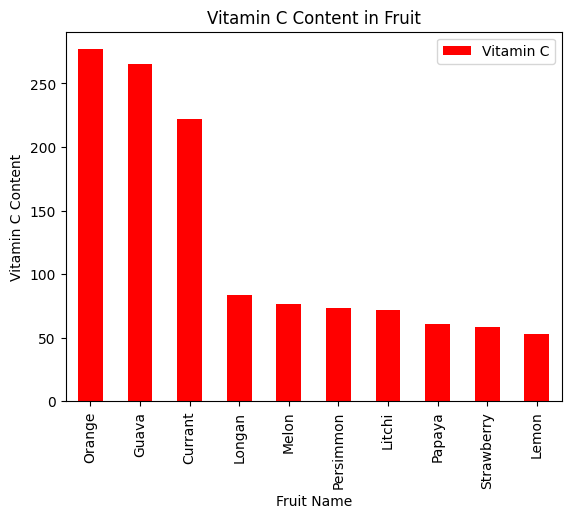

In [12]:
import matplotlib.pyplot as plt

#Plot the histogram
fruit_vitamin_c.plot(kind='bar', x='Fruit Name', y='Vitamin C', color='red', legend=True)

#Customize the plot
plt.xlabel('Fruit Name')
plt.ylabel('Vitamin C Content')
plt.title('Vitamin C Content in Fruit')

#Show the histogram
plt.show()

Oranges are renowned for having the highest vitamin C content among fruits. Following closely are three other excellent options: Guava, Currant, and Longan. Incorporating these fruits into your diet is advisable for those seeking a substantial increase in vitamin C intake.

## **2. Describe the relationship between the calories and water content of a food item**

To establish the correlation between caloric content and water content, a statistical approach will be employed, utilizing scatterplot charts and conducting a Pearson correlation test.

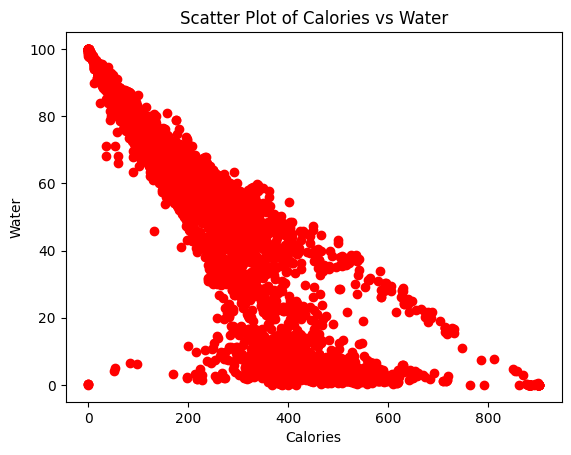

In [24]:
#Calories and Water Relation analysis with scatterplot
plt.scatter(df_food_final['Calories'], df_food_final['Water'], color='r')
plt.xlabel('Calories')
plt.ylabel('Water')
plt.title('Scatter Plot of Calories vs Water')
plt.show()

In [25]:
#Calories and water analysis with pearson correlation test
correlation = df_food_final['Calories'].corr(df_food_final['Water'], method='pearson')

#Display correlation value
correlation

-0.8954571656706273

Upon visually inspecting the scatterplot, it's apparent that as calorie intake goes up, there's a noticeable downward trend, signaling a negative correlation between calorie content and water content. The Pearson correlation coefficient, coming in at -0.8954, solidifies this observation. In essence, our analysis points to a negative connection between calories and water content—meaning, when calorie intake rises, water content tends to drop. As a practical suggestion, folks on a high-calorie diet might want to consider upping their water intake for overall health and well-being.

## 3. What are the possible drawbacks of a zero-carb diet? What could be the drawbacks of a very high-protein diet?

To understand potential drawbacks, it's important to explore the correlations among all nutrient variables. Check out the heatmap below for a visual representation of the correlations.

In [26]:
#Make dataframe that only contain nutrient variables
nutrients = df_food_final.drop(['FDC_ID', 'Item', 'Category'], axis=1)

#Display nutrient dataframe
nutrients

Calories  Protein  Carbohydrate  ...  Water  Alcohol  Vitamin C
0        307.0     5.88         41.18  ...  35.50      0.0        0.0
1        330.0     4.34         53.42  ...  27.86      0.0        0.1
2        377.0     6.10         79.80  ...   3.20      0.0        0.0
3        232.0     8.00         46.00  ...  42.60      0.0        0.0
4        273.0     6.58         41.05  ...  40.34      0.0        0.0
...        ...      ...           ...  ...    ...      ...        ...
7788     131.0    26.83          0.00  ...  68.81      0.0        0.0
7789     111.0    22.95          0.00  ...  74.38      0.0        0.0
7790     146.0    30.19          0.00  ...  66.28      0.0        0.0
7791     109.0    20.60          0.00  ...  75.84      0.0        0.0
7792     143.0    27.10          0.00  ...  68.21      0.0        0.0

[7793 rows x 9 columns]

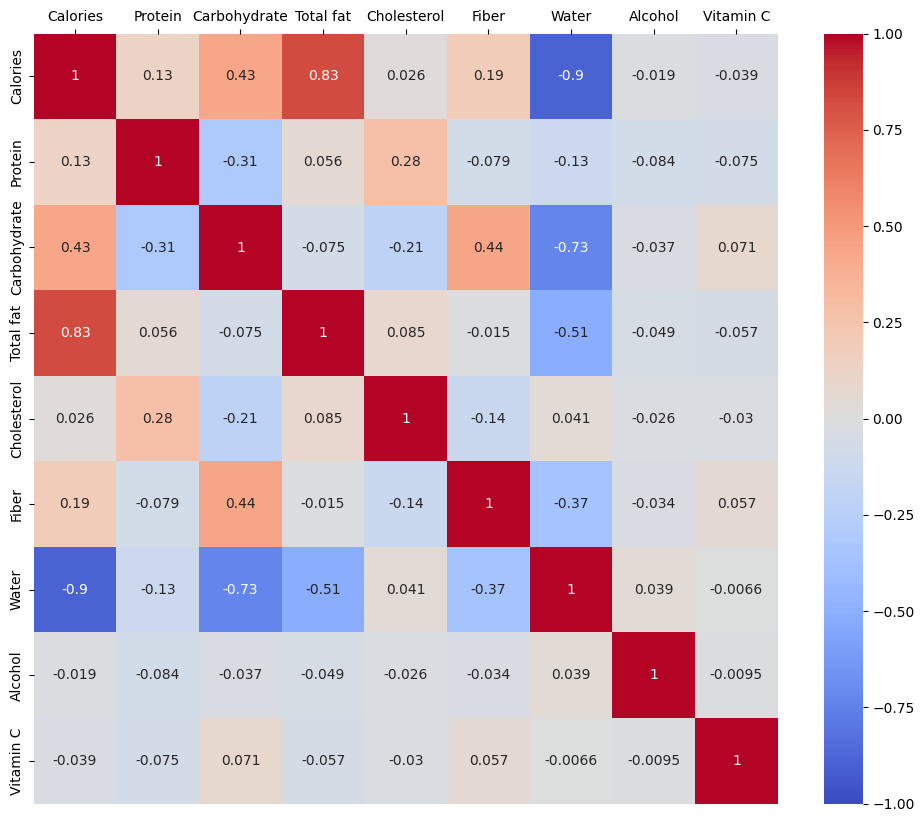

In [27]:
import seaborn as sns

#Find correlation between each nutrient variable
nutrients_corr = nutrients.corr()

# Create a heatmap
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(nutrients_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Place x-axis labels at the top
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

# Show the plot
plt.show()

Carbohydrates exhibit a moderate positive correlation with calories, as indicated by a Pearson correlation score of 0.43. This represents the strongest correlation observed between calories and other nutritional components. Similarly, carbohydrates also demonstrate a moderate positive correlation with fiber, with a Pearson correlation score of 0.44, marking the highest correlation between fiber and other nutritional factors. Conversely, protein shows a positive correlation with cholesterol, albeit weak, at 0.28.

Our analysis leads us to identify certain drawbacks associated with a zero-carb diet:
-Increased likelihood of fatigue due to inadequate calorie intake, impacting daily activities such as lack of concentration, especially in extreme conditions.
-Elevated risk of constipation owing to insufficient fiber intake in the diet.

Additionally, a high-protein diet poses a potential risk of elevated cholesterol levels, although the effect is not deemed significant. The likelihood of increased cholesterol is further influenced by lifestyle choices. It is imperative to adopt a balanced approach to nutrition to mitigate these potential disadvantages.

## 4. Fit a linear model to test whether these estimates agree with the data.

We want to test whether it is correct if a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. To solve this question we need to calculate calorie from each nutrient contents.

In [17]:
# Make new dataframe consisting of calories, calories from protein, calories from total fat, and calories from carbohydrate
calories = pd.DataFrame({
    'FDC_ID' : df_food_final['FDC_ID'],
    'Item' : df_food_final['Item'],
    'Category' : df_food_final['Category'],
    'Calories': df_food_final['Calories'],
    'Total Fat Calories': df_food_final['Total fat'] * 9,
    'Protein Calories': df_food_final['Protein'] * 4,
    'Carbohydrate Calories': df_food_final['Carbohydrate'] * 4
})

calories

FDC_ID  ... Carbohydrate Calories
0     167512  ...                164.72
1     167513  ...                213.68
2     167514  ...                319.20
3     167515  ...                184.00
4     167516  ...                164.20
...      ...  ...                   ...
7788  175300  ...                  0.00
7789  175301  ...                  0.00
7790  175302  ...                  0.00
7791  175303  ...                  0.00
7792  175304  ...                  0.00

[7793 rows x 7 columns]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


#Defining x and y variable for linear regression modeling
x = calories.drop(['FDC_ID','Item','Category','Calories'], axis=1) #We want to extract total fat calories, protein calories, and carbohydrate calories as our x
y = calories['Calories']

#Split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Linear regression modeling
X1 = sm.add_constant(x_train)
lin_model=sm.OLS(y_train, X1)
result=lin_model.fit()
print(result.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.989     
Dependent Variable: Calories         AIC:                53159.6219
Date:               2023-11-21 12:08 BIC:                53186.5730
No. Observations:   6234             Log-Likelihood:     -26576.   
Df Model:           3                F-statistic:        1.954e+05 
Df Residuals:       6230             Prob (F-statistic): 0.00      
R-squared:          0.989            Scale:              295.55    
-------------------------------------------------------------------
                      Coef.  Std.Err.    t     P>|t|  [0.025 0.975]
-------------------------------------------------------------------
const                 4.2851   0.4360   9.8284 0.0000 3.4304 5.1398
Total Fat Calories    0.9779   0.0015 652.8764 0.0000 0.9750 0.9808
Protein Calories      0.9978   0.0053 188.7794 0.0000 0.9875 1.0082
Carbohydrate Calories 0.9502   0.0023 421.6850 0.0000 0.9457 0.954

Based on the analysis, we've found that the p-values for all variables are less than 0.05, indicating that each variable significantly influences the total calorie count.

## 5. Analyze the errors of your linear model to see what could be the hidden sources of calories in food.

In [19]:
#Multicorrelation test
x_corr=x_train.corr()

#Display correlation dataframe
x_corr

Total Fat Calories  ...  Carbohydrate Calories
Total Fat Calories               1.000000  ...              -0.067478
Protein Calories                 0.056834  ...              -0.312269
Carbohydrate Calories           -0.067478  ...               1.000000

[3 rows x 3 columns]

We must assess four fundamental assumptions for our linear regression model based on the outcomes of our Ordinary Least Squares (OLS) analysis.

1. Normality Test:

-The prob(omnibus) is 0.00, which is less than the significance level (alpha) of 0.05.
-This indicates that the residuals from our model are not normally distributed.

2. Homoscedasticity Test:

-The p-value (Prob(JB)) serves as an indicator for potential violation of the homoscedasticity assumption.
-In our case, the p-value is 0.00, which is less than the significance level of 0.05.
-We can therefore conclude that the variance of the model residuals is not constant, indicating the presence of heteroscedasticity.

3. Multicollinearity Test:

-This test assesses whether variables have a correlation greater than 0.5 with each other.
-Our analysis reveals no significant correlation between variables, indicating the absence of multicollinearity in our data.

4. Autocorrelation Test:

-The Durbin-Watson test yields a result of 2.
-A value of 2 suggests no autocorrelation, indicating that our model residuals are independent.

To enhance the robustness of our analysis, we also need to check for potential outliers in our data.

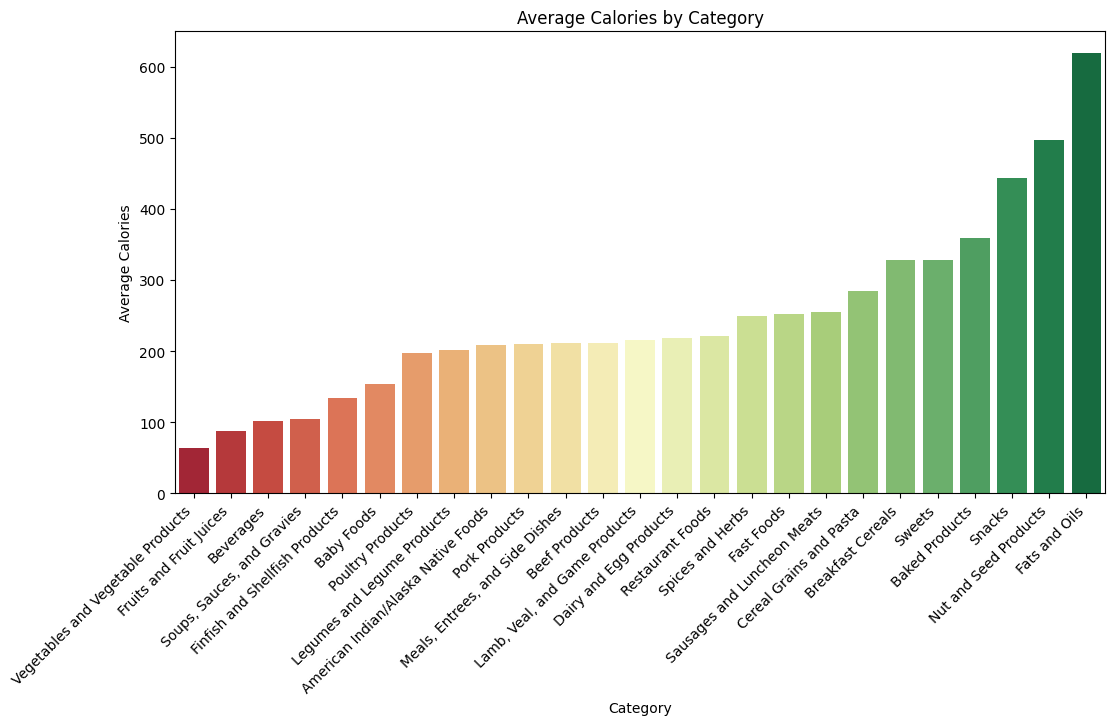

In [20]:
#Make a dataframe of the average calories value for each group
average_calories_by_category = df_food_final.groupby(['Category'])[['Calories']].mean().reset_index()

#Sort the data by average calories
average_calories = average_calories_by_category.sort_values(by='Calories')

#Create a color gradient from green to red
color_palette = sns.color_palette("RdYlGn", len(average_calories))

#Plot the average calories for each category with color gradient
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Category', y='Calories', data=average_calories, palette=color_palette)

plt.title('Average Calories by Category')
plt.xlabel('Category')
plt.ylabel('Average Calories')
plt.xticks(rotation=45, ha='right') #Rotate the text to 45 degree so we can see the graph better
plt.show()

In [21]:
from scipy.stats import iqr

#Function for calculate iqr value for each column
def calculate_bounds(column_data):
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    lower_bound = Q1 - 1.5 * iqr(column_data)
    upper_bound = Q3 + 1.5 * iqr(column_data)
    return lower_bound, upper_bound


bounds = {}

#Store lower bound and upper bound of the datas
for nutrient in ['Calories', 'Total Fat Calories', 'Protein Calories', 'Carbohydrate Calories']:
    lower_bound, upper_bound = calculate_bounds(calories[nutrient])
    bounds[nutrient] = {'lower': lower_bound, 'upper': upper_bound}

#Make dataframe that consist rows with outliers
outliers = calories[
    (calories['Calories'] < bounds['Calories']['lower']) | (calories['Calories'] > bounds['Calories']['upper']) |
    (calories['Total Fat Calories'] < bounds['Total Fat Calories']['lower']) | (calories['Total Fat Calories'] > bounds['Total Fat Calories']['upper']) |
    (calories['Protein Calories'] < bounds['Protein Calories']['lower']) | (calories['Protein Calories'] > bounds['Protein Calories']['upper']) |
    (calories['Carbohydrate Calories'] < bounds['Carbohydrate Calories']['lower']) | (calories['Carbohydrate Calories'] > bounds['Carbohydrate Calories']['upper'])
]

outliers

FDC_ID  ... Carbohydrate Calories
2     167514  ...                319.20
26    167592  ...                304.12
27    167593  ...                309.36
39    167924  ...                297.00
42    167927  ...                287.32
...      ...  ...                   ...
7729  174884  ...                  0.00
7736  174891  ...                  0.00
7737  174892  ...                  0.00
7754  175266  ...                  0.00
7755  175267  ...                  0.00

[1272 rows x 7 columns]

In [22]:
#Count outliers based on its category
category_counts = outliers['Category'].value_counts()

category_counts

Fats and Oils                          169
Sweets                                 160
Breakfast Cereals                      150
Baked Products                         130
Cereal Grains and Pasta                109
Nut and Seed Products                  100
Snacks                                  96
Beverages                               44
Legumes and Legume Products             38
American Indian/Alaska Native Foods     35
Baby Foods                              29
Dairy and Egg Products                  26
Pork Products                           26
Beef Products                           25
Lamb, Veal, and Game Products           24
Fruits and Fruit Juices                 23
Poultry Products                        22
Vegetables and Vegetable Products       18
Spices and Herbs                        14
Meals, Entrees, and Side Dishes         12
Sausages and Luncheon Meats             11
Soups, Sauces, and Gravies               9
Fast Foods                               1
Finfish and

Approximately 10% of the data points exhibit outlier behavior. Despite transforming the data, the impact on our results is not expected to be significantly altered. Our analysis reveals that outliers are associated with specific categories, underscoring the importance of retaining these data points. Deleting such outliers risks the removal of valuable information integral to our analysis. Outliers can manifest as either lower or higher values. In order to assist you in customizing your dietary plan, we aim to identify the top 10 most frequently mentioned keywords in each type of caloric content.

In [23]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Download NLTK data for tokenization and stopwords
nltk.download('punkt')
nltk.download('stopwords')

#Function to tokenize and clean text
def tokenize_and_clean(text):
    tokens = word_tokenize(text)
    return [word.lower() for word in tokens if word.isalpha()]

#Function to clean and count keywords
def clean_and_count_keywords(df, target_column):
    df['Cleaned_Item'] = df[target_column].astype(str).apply(tokenize_and_clean)
    stop_words = set(stopwords.words('english'))
    df['Cleaned_Item'] = df['Cleaned_Item'].apply(lambda words: [word for word in words if word not in stop_words])
    cleaned_words = [word for words in df['Cleaned_Item'] for word in words]
    return [word for word, _ in Counter(cleaned_words).most_common(10)]

#Select the top and bottom 30 items for each category
highest_tfc = outliers.sort_values('Total Fat Calories', ascending=False).head(30)
lowest_tfc = outliers.sort_values('Total Fat Calories', ascending=True).head(30)
highest_pc = outliers.sort_values('Protein Calories', ascending=False).head(30)
lowest_pc = outliers.sort_values('Protein Calories', ascending=True).head(30)
highest_cc = outliers.sort_values('Carbohydrate Calories', ascending=False).head(30)
lowest_cc = outliers.sort_values('Carbohydrate Calories', ascending=True).head(30)

#Create a DataFrame to store cleaned keywords
columns_of_interest = ['High Fat Keywords', 'Low Fat Keywords', 'High Protein Keywords',
                        'Low Protein Keywords', 'High Carbohydrate Keywords', 'Low Carbohydrate Keywords']
high_low_calories = pd.DataFrame(index=range(10), columns=columns_of_interest)

#Clean and count keywords for each category
high_low_calories['High Fat Keywords'] = clean_and_count_keywords(highest_tfc, 'Item')
high_low_calories['Low Fat Keywords'] = clean_and_count_keywords(lowest_tfc, 'Item')
high_low_calories['High Protein Keywords'] = clean_and_count_keywords(highest_pc, 'Item')
high_low_calories['Low Protein Keywords'] = clean_and_count_keywords(lowest_pc, 'Item')
high_low_calories['High Carbohydrate Keywords'] = clean_and_count_keywords(highest_cc, 'Item')
high_low_calories['Low Carbohydrate Keywords'] = clean_and_count_keywords(lowest_cc, 'Item')

#Display the DataFrame
high_low_calories

[nltk_data] Downloading package punkt to /home/repl/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


High Fat Keywords  ... Low Carbohydrate Keywords
0               oil  ...                       oil
1      hydrogenated  ...              hydrogenated
2        industrial  ...                industrial
3        shortening  ...                shortening
4         partially  ...                       soy
5               soy  ...                    frying
6              palm  ...                 partially
7            frying  ...                       fat
8           soybean  ...                    canola
9              fish  ...                      fish

[10 rows x 6 columns]

The following are the top 10 keywords associated with the highest and lowest values for each type of caloric content. These keywords can serve as valuable references when nutritional information is unavailable on food packaging. Aligning these keywords with food descriptions can assist you in making informed dietary choices.